### 📀 **Capstone Project: AI-Powered Rainfall Prediction for High-Impact Decision Making**

## **1️⃣ Business Understanding & Problem Statement**

### 🌍 **Context & Motivation**
Accurate rainfall prediction is critical in **agriculture, disaster preparedness, and urban planning**. A missed forecast can mean **devastating crop losses, infrastructure failures, or economic disruptions**. Traditional weather models rely on rigid rule-based systems, often failing to capture **complex, non-linear interactions** between meteorological variables.

This project takes a **modern AI-driven approach** by leveraging **advanced machine learning** techniques to develop a high-accuracy binary classification model that predicts **rainfall occurrence** with unprecedented precision.

### 💪 **Why This Matters**
- **Farmers & Agribusiness**: Optimizing irrigation schedules, reducing crop loss risk.
- **Disaster Management**: Enhancing flood forecasting & emergency preparedness.
- **Urban Infrastructure**: Assisting city planners in drainage & water resource management.

### 🔖 **Project Challenge & Competitive Edge**
- Build a **state-of-the-art predictive model** using real-world historical weather data.
- Ensure the model **outperforms traditional methods** and ranks competitively in **Kaggle’s leaderboard-driven environment**.
- Demonstrate a **scalable, real-world AI solution** with potential deployment applications beyond this competition.

---

## **2️⃣ Project Objectives & Key Performance Indicators (KPIs)**

### 🎯 **Primary Objective**
- Develop a **high-accuracy machine learning model** to predict **rainfall occurrence** (Binary Classification: **Rain = 1, No Rain = 0**).

### 📈 **Secondary Objectives**
1. **Exploratory Data Analysis (EDA)**: Discover underlying weather patterns that influence rainfall.
2. **Feature Engineering**: Enhance the dataset with high-impact variables for model optimization.
3. **Model Selection & Tuning**: Implement and benchmark various **machine learning algorithms**.
4. **Performance Optimization**: Achieve **≥97% accuracy** and secure a **Top 10 Kaggle leaderboard placement**.
5. **Academic & Industry Impact**: Showcase a robust, end-to-end AI workflow for **real-world adoption**.
6. **Reproducibility & Documentation**: Ensure the project is well-documented, easy to replicate, and meets industry best practices.

---

## **3️⃣ Data Understanding & Competitive Dataset Analysis**

### 📚 **Dataset Source & Overview**
This project is based on **Kaggle’s Playground Series - S5E3 competition dataset**, consisting of **historical meteorological data** designed to challenge participants in predictive modeling.

### 🔄 **Dataset Breakdown**
- **Train Dataset (`train.csv`)**: **2,190** samples with **13 features**.
- **Test Dataset (`test.csv`)**: **730** samples with **12 features** (excludes `rainfall` target variable).
- **Submission File (`sample_submission.csv`)**: Kaggle’s submission format for predicted outputs.

### 🎯 **Feature Engineering Considerations**
| **Feature**       | **Description & Significance**  |
|------------------|--------------------------------|
| `day`           | Sequential identifier (potential time-series dependencies). |
| `pressure`      | Atmospheric pressure, influencing rainfall patterns. |
| `maxtemp`      | Maximum recorded temperature, a potential indicator of precipitation likelihood. |
| `temparature`   | Average recorded temperature, linked to evaporation and condensation cycles. |
| `mintemp`      | Minimum temperature, useful for analyzing dew point variations. |
| `dewpoint`      | Key metric for moisture content in the air. |
| `humidity`      | Relative humidity (%), highly correlated with rainfall probability. |
| `cloud`         | Cloud cover percentage (%), a strong predictor for precipitation. |
| `sunshine`      | Total hours of sunshine, inversely affecting rainfall chances. |
| `winddirection` | Wind direction, impacting weather system movements. |
| `windspeed`     | Wind speed, affecting cloud formation and storm intensity. |
| `rainfall`      | **Target Variable** (1 = Rain, 0 = No Rain). |

### 🔬 **Initial Observations & Challenges**
- **All features are numerical**, simplifying preprocessing.
- **Potential Class Imbalance**: Requires resampling techniques (e.g., SMOTE, undersampling).
- **Feature Correlation Analysis**: High correlation expected among `humidity`, `dewpoint`, and `cloud`.
- **Outlier Detection**: Potential extreme values in `pressure` and `windspeed`.
- **Missing Values**: 1 missing value in `winddirection`, which will be imputed.

---

### 🚀 **Next Steps & Strategic Roadmap**

✅ **Step 1: Exploratory Data Analysis (EDA)**
- Visualize distributions, relationships, and correlations.
- Identify missing values, feature importance, and outliers.

✅ **Step 2: Feature Engineering & Data Preprocessing**
- Create derived features (e.g., **humidity-temperature index, pressure deltas**).
- Normalize & scale features for improved model performance.

✅ **Step 3: Baseline Model Implementation**
- Train **Logistic Regression, Decision Trees, and Random Forest** as benchmarks.

✅ **Step 4: Advanced Model Development & Hyperparameter Tuning**
- Implement **XGBoost, LightGBM, and CatBoost**.
- Optimize using **GridSearchCV, Bayesian Optimization, and Optuna**.

✅ **Step 5: Model Evaluation & Leaderboard Strategy**
- Use **AUC-ROC, Precision-Recall, and Cross-Validation** to fine-tune accuracy.
- Deploy **Stacking, Blending, and Ensemble Learning** for leaderboard performance.

✅ **Step 6: Reproducibility & Documentation**
- **Environment Setup**: Create `requirements.txt` for dependencies.
- **Code Modularity**: Structure notebooks for clarity.
- **README Optimization**: Clearly document project workflow.
- **GitHub Repository Compliance**: Ensure README includes **elevator pitch, dataset details, implementation steps, and model performance**.

✅ **Step 7: Final Submission & Academic Presentation**
- Optimize final model selection and prepare Kaggle submissions.
- Document findings in **Jupyter notebooks & GitHub README** for industry-grade presentation.
- Prepare for **capstone defense** with clear justifications for model choices.

---

### 🏆 **Conclusion: The Road to Kaggle & Academic Excellence**
This project represents a **cutting-edge application of AI in meteorology**, bridging academia and industry by showcasing **practical, high-impact machine learning workflows**. Through rigorous **data exploration, feature engineering, model optimization, and leaderboard analysis**, we aim to achieve a **Top 10 Kaggle ranking** while contributing **meaningful insights to real-world weather forecasting applications**.

🔗 **GitHub Repository (Work in Progress)**: [https://github.com/Otim135/PHASE_5_CAPSTONE_PROJECT]

🚀 **Next Up:** EDA & Feature Engineering! 🔍📊


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())


/Users/mac/Documents/Phase 5 Capstone Project/PHASE_5_CAPSTONE_PROJECT/Notebooks


In [4]:
df_train = pd.read_csv('../Data/train.csv')
df_train.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [5]:
df_test = pd.read_csv('../Data/test.csv')
df_test.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
5,2195,6,1027.1,15.6,12.6,11.5,9.0,76.0,94.0,0.0,20.0,41.4
6,2196,7,1022.6,15.5,13.7,10.7,11.8,79.0,95.0,0.0,20.0,43.1
7,2197,8,1013.5,20.5,16.2,15.2,13.1,94.0,93.0,0.2,70.0,41.3
8,2198,9,1021.3,16.3,13.2,11.3,10.8,85.0,99.0,0.1,20.0,34.0
9,2199,10,1026.1,10.4,8.5,7.0,3.1,69.0,88.0,0.0,20.0,26.4


In [6]:
# Check data types
print(df_train.info())

# Summary statistics
print(df_train.describe())

# Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

In [7]:
# validation_notebook.ipynb

import pandas as pd
from Preprocessing import build_preprocessing_pipeline, save_pipeline

# 1. Load datasets
train_path = '../Data/train.csv'
test_path = '../Data/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 2. Separate target
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define features
numeric_features = ['windspeed', 'temparature', 'maxtemp', 'mintemp', 'humidity']
categorical_features = ['winddirection']

# 4. Build pipeline
pipeline = build_preprocessing_pipeline(numeric_features, categorical_features)

# 5. Fit on train data
df_train_transformed = pipeline.fit_transform(df_train)

# 6. Transform test data
df_test_transformed = pipeline.transform(df_test)

# 7. Save the pipeline
save_pipeline(pipeline, 'full_preprocessing_pipeline.joblib')

# 8. Validation
print(f"Train transformed shape: {df_train_transformed.shape}")
print(f"Test transformed shape: {df_test_transformed.shape}")
print("✅ Validation successful and pipeline saved!")


Train transformed shape: (2190, 48)
Test transformed shape: (730, 48)
✅ Validation successful and pipeline saved!


In [8]:
print(df_train.columns)

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')


In [9]:
pd.read_csv('../Data/train.csv').head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


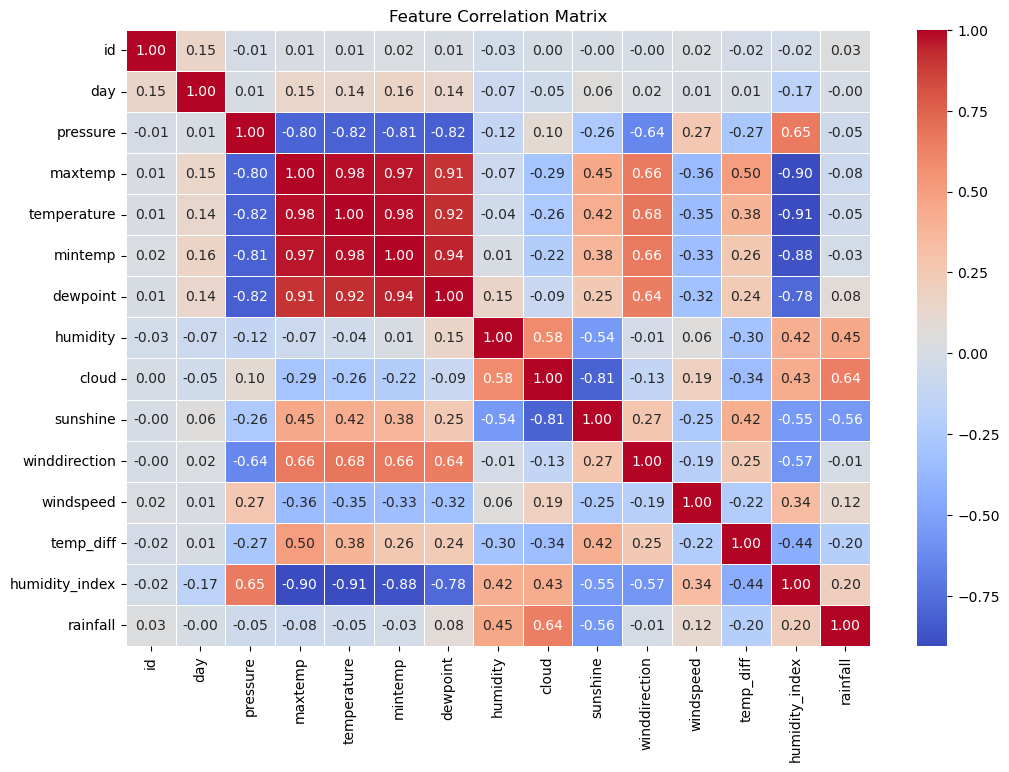

Removed Highly Correlated Features: ['temperature', 'mintemp', 'dewpoint']
Cleaned training dataset saved as 'cleaned_train_with_features.csv'
✅ Feature engineering and correlation cleaning completed. Cleaned data shape: (2190, 13)


In [10]:


import pandas as pd
from Feature_Engineering import build_feature_engineering_pipeline, plot_correlation_matrix, drop_highly_correlated_features

# 1. Load data
df_train = pd.read_csv('../Data/train.csv')

# 2. Separate target and drop before feature engineering
target = df_train['rainfall']
df_train.drop(columns=['rainfall'], inplace=True)

# 3. Define columns where outliers need to be capped
columns_to_cap = ['windspeed', 'temperature']

# 4. Build and apply feature engineering pipeline
feature_pipeline = build_feature_engineering_pipeline(columns_to_cap)
df_train_engineered = feature_pipeline.fit_transform(df_train)

# 5. Add back target for correlation check
df_train_engineered['rainfall'] = target

# 6. Plot correlation matrix
plot_correlation_matrix(df_train_engineered)

# 7. Drop highly correlated features and save
df_cleaned = drop_highly_correlated_features(df_train_engineered, threshold=0.85, save_path='cleaned_train_with_features.csv')

# 8. Check results
print(f"✅ Feature engineering and correlation cleaning completed. Cleaned data shape: {df_cleaned.shape}")


Top features by mutual information:
           Feature  MI_Score
4            cloud  0.215513
5         sunshine  0.160593
3         humidity  0.144542
7          day_sin  0.069280
0               id  0.068565
45  humidity_index  0.060594
8          day_cos  0.029093
9       temp_range  0.023104
35   winddir_220.0  0.017836
1         pressure  0.017695


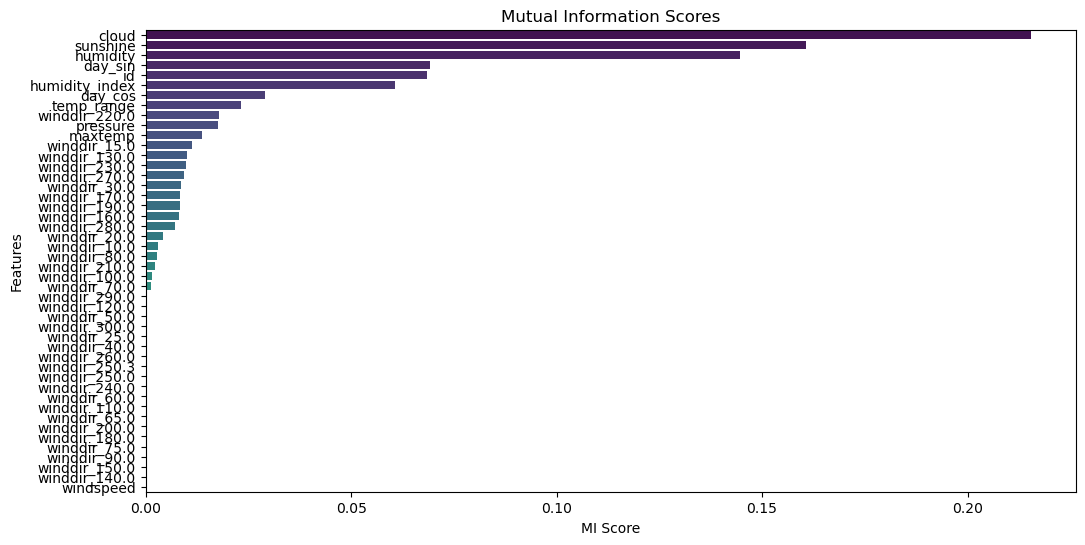

Dropping low impact features (MI < 0.02): ['winddir_220.0', 'pressure', 'maxtemp', 'winddir_15.0', 'winddir_130.0', 'winddir_230.0', 'winddir_270.0', 'winddir_30.0', 'winddir_170.0', 'winddir_190.0', 'winddir_160.0', 'winddir_280.0', 'winddir_20.0', 'winddir_10.0', 'winddir_80.0', 'winddir_210.0', 'winddir_100.0', 'winddir_70.0', 'winddir_290.0', 'winddir_120.0', 'winddir_50.0', 'winddir_300.0', 'winddir_25.0', 'winddir_40.0', 'winddir_260.0', 'winddir_250.3', 'winddir_250.0', 'winddir_240.0', 'winddir_60.0', 'winddir_110.0', 'winddir_65.0', 'winddir_200.0', 'winddir_180.0', 'winddir_75.0', 'winddir_90.0', 'winddir_150.0', 'winddir_140.0', 'windspeed']
Dropping wind direction features: ['winddir_10.0', 'winddir_15.0', 'winddir_20.0', 'winddir_25.0', 'winddir_30.0', 'winddir_40.0', 'winddir_50.0', 'winddir_60.0', 'winddir_65.0', 'winddir_70.0', 'winddir_75.0', 'winddir_80.0', 'winddir_90.0', 'winddir_100.0', 'winddir_110.0', 'winddir_120.0', 'winddir_130.0', 'winddir_140.0', 'winddir_15

In [11]:

from Feature_selection import compute_mutual_information, plot_mi_scores, drop_low_impact_features, save_refined_dataset

# 1. Load the cleaned dataset with engineered features
df_cleaned = pd.read_csv('../Data/cleaned_train.csv')

# 2. Handle missing values in windspeed_category if present
if 'windspeed_category' in df_cleaned.columns:
    df_cleaned['windspeed_category'] = df_cleaned['windspeed_category'].fillna('Unknown')

# 3. Compute mutual information scores
mi_df = compute_mutual_information(df_cleaned, target_column='rainfall')

# 4. Visualize mutual information scores
plot_mi_scores(mi_df)

# 5. Drop low-impact features and wind direction features
df_refined = drop_low_impact_features(df_cleaned, mi_df, threshold=0.02, target_column='rainfall')

# 6. Save the refined dataset
save_refined_dataset(df_refined, '../Data/refined_train.csv')

# 7. Confirm completion
print(f"✅ Feature selection completed. Refined dataset shape: {df_refined.shape}")

✅ Applied SMOTE. New class distribution:
rainfall
1    1331
0    1331
Name: count, dtype: int64
Training LogisticRegression...
Model saved to ../Data/logisticregression_model.pkl
Training RandomForest...
Model saved to ../Data/randomforest_model.pkl
Training GradientBoosting...
Model saved to ../Data/gradientboosting_model.pkl
Training XGBoost...
Model saved to ../Data/xgboost_model.pkl
Training LightGBM...
[LightGBM] [Info] Number of positive: 1331, number of negative: 1331
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 2662, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model saved to ../Data/lightgbm_model.pkl
Training AdaBoost...


/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model saved to ../Data/adaboost_model.pkl
Training ExtraTrees...
Model saved to ../Data/extratrees_model.pkl
Training SVM...
Model saved to ../Data/svm_model.pkl

Evaluating LogisticRegression...
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       119
           1       0.89      0.86      0.87       319

    accuracy                           0.82       438
   macro avg       0.77      0.79      0.78       438
weighted avg       0.83      0.82      0.82       438

Confusion Matrix:
 [[ 85  34]
 [ 45 274]]
Accuracy Score: 0.8196
ROC AUC Score: 0.8618845657385211


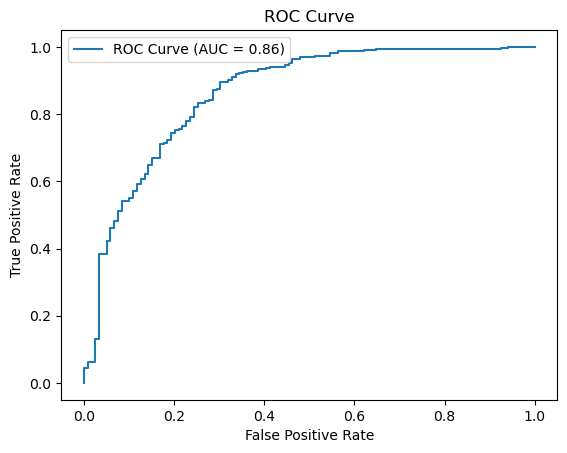


Evaluating RandomForest...
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       119
           1       0.88      0.87      0.87       319

    accuracy                           0.82       438
   macro avg       0.77      0.78      0.77       438
weighted avg       0.82      0.82      0.82       438

Confusion Matrix:
 [[ 82  37]
 [ 43 276]]
Accuracy Score: 0.8174
ROC AUC Score: 0.8448144147941309


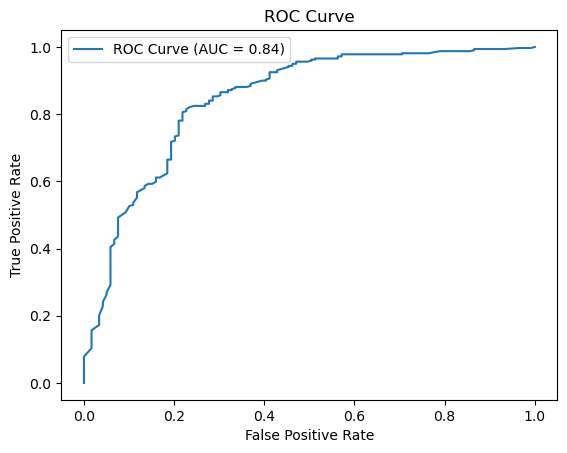


Evaluating GradientBoosting...
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       119
           1       0.88      0.88      0.88       319

    accuracy                           0.82       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.82      0.82      0.82       438

Confusion Matrix:
 [[ 81  38]
 [ 39 280]]
Accuracy Score: 0.8242
ROC AUC Score: 0.8477911540791866


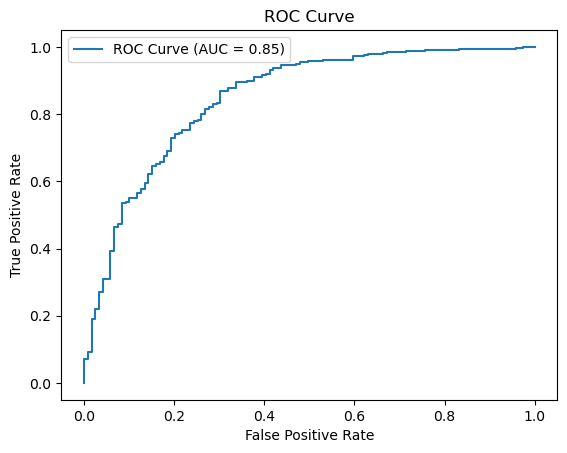


Evaluating XGBoost...
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       119
           1       0.84      0.87      0.86       319

    accuracy                           0.79       438
   macro avg       0.73      0.72      0.73       438
weighted avg       0.78      0.79      0.79       438

Confusion Matrix:
 [[ 67  52]
 [ 40 279]]
Accuracy Score: 0.7900
ROC AUC Score: 0.8138879376201892


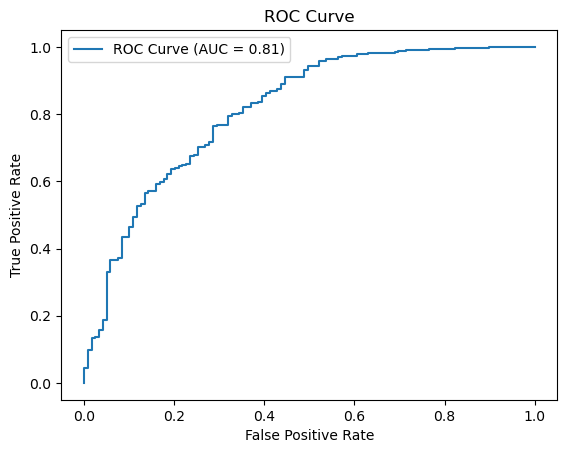


Evaluating LightGBM...
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67       119
           1       0.87      0.90      0.89       319

    accuracy                           0.83       438
   macro avg       0.79      0.77      0.78       438
weighted avg       0.83      0.83      0.83       438

Confusion Matrix:
 [[ 76  43]
 [ 31 288]]
Accuracy Score: 0.8311
ROC AUC Score: 0.833645056768789


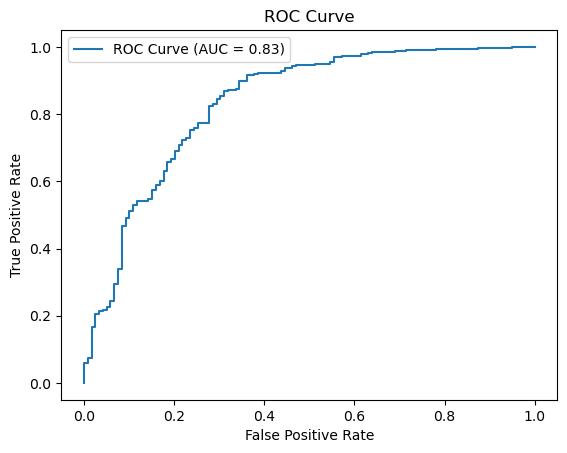


Evaluating AdaBoost...
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64       119
           1       0.87      0.85      0.86       319

    accuracy                           0.80       438
   macro avg       0.75      0.76      0.75       438
weighted avg       0.81      0.80      0.80       438

Confusion Matrix:
 [[ 79  40]
 [ 47 272]]
Accuracy Score: 0.8014
ROC AUC Score: 0.8342772845815443


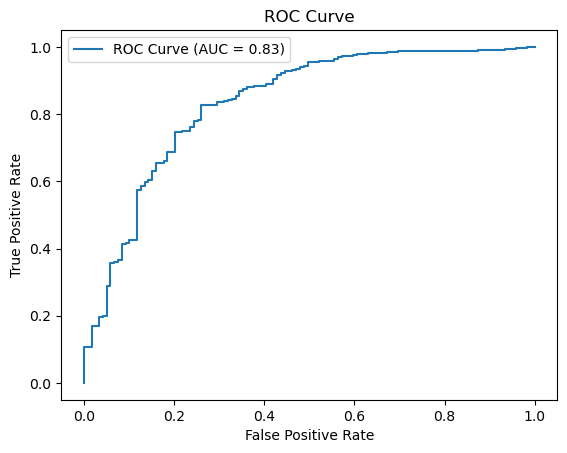


Evaluating ExtraTrees...
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       119
           1       0.88      0.88      0.88       319

    accuracy                           0.83       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.83      0.83      0.83       438

Confusion Matrix:
 [[ 82  37]
 [ 39 280]]
Accuracy Score: 0.8265
ROC AUC Score: 0.8437475303601063


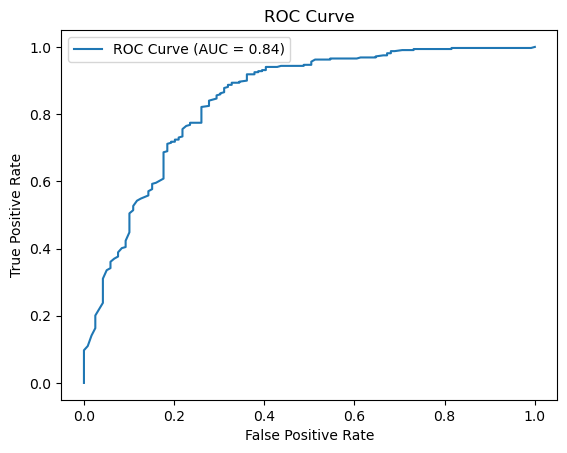


Evaluating SVM...
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64       119
           1       0.85      0.90      0.88       319

    accuracy                           0.82       438
   macro avg       0.77      0.75      0.76       438
weighted avg       0.81      0.82      0.81       438

Confusion Matrix:
 [[ 70  49]
 [ 31 288]]
Accuracy Score: 0.8174
ROC AUC Score: 0.8047469771607701


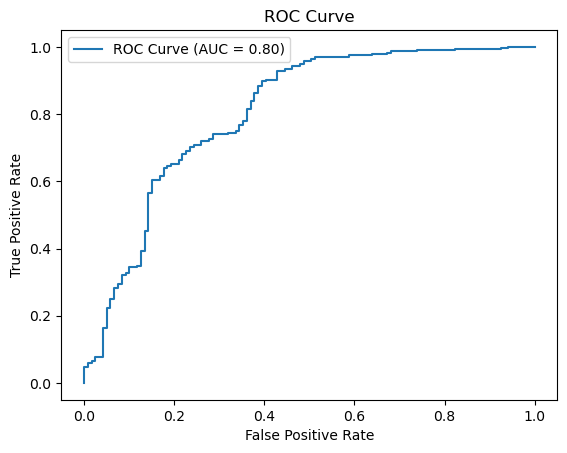


Training and evaluating stacking ensemble...


/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1331, number of negative: 1331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 2662, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/learn_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAM

[LightGBM] [Info] Number of positive: 1065, number of negative: 1065
[LightGBM] [Info] Number of positive: 1065, number of negative: 1065
[LightGBM] [Info] Number of positive: 1064, number of negative: 1065
[LightGBM] [Info] Number of positive: 1065, number of negative: 1064
[LightGBM] [Info] Number of positive: 1065, number of negative: 1065
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 8
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

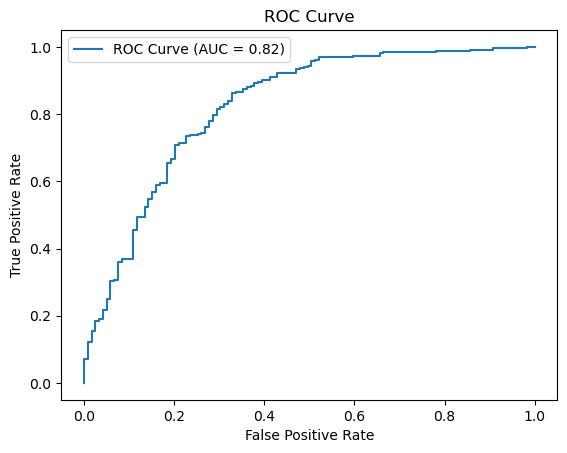

Model saved to ../Data/best_stacking_ensemble_model.pkl
✅ All models trained, evaluated, and saved successfully.


In [4]:
# train_and_save_models.ipynb

import pandas as pd
from Model_Training import (
    load_cleaned_data,
    split_features_target,
    apply_smote,
    train_models,
    build_stacking_ensemble,
    evaluate_model,
    save_model
)

# 1. Load cleaned and refined data
df_cleaned = load_cleaned_data("../Data/refined_train.csv")

# 2. Split data into training and validation sets
X_train, X_val, y_train, y_val = split_features_target(df_cleaned)

# 3. Apply SMOTE for balanced training data
X_train, y_train = apply_smote(X_train, y_train)

# 4. Train all individual models and save them
models = train_models(X_train, y_train)

# 5. Evaluate each model and confirm save
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_val, y_val)

# 6. Build, train, and evaluate stacking ensemble with stronger configuration
print("\nTraining and evaluating stacking ensemble...")
stack_model = build_stacking_ensemble(models)
stack_model.fit(X_train, y_train)
evaluate_model(stack_model, X_val, y_val)

# 7. Save final stacking ensemble model
save_model(stack_model, "../Data/best_stacking_ensemble_model.pkl")

print("✅ All models trained, evaluated, and saved successfully.")
